In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

预测糖尿病的患病指标 
- task
    * 使用scikit-learn的线型回归模型对糖尿病的指标值进行预测 
    * 选取1/5的数据作为测试集 
- info
    * AGE：年龄 
    * SEX: 性别 
    * BMI: 体质指数（Body Mass Index） 
    * BP: 平均血压（Average Blood Pressure） 
    * S1~S6: 一年后的6项疾病级数指标 
    * Y: 一年后患疾病的定量指标，为需要预测的标签

In [3]:
data_df = pd.read_csv('../data/diabetes.csv')
data_df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
AGE    442 non-null int64
SEX    442 non-null int64
BMI    442 non-null float64
BP     442 non-null float64
S1     442 non-null int64
S2     442 non-null float64
S3     442 non-null float64
S4     442 non-null float64
S5     442 non-null float64
S6     442 non-null int64
Y      442 non-null int64
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [5]:
FEAT_COLS = data_df.columns.tolist()[:-1]
FEAT_COLS

['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a4c57f0>,
      dtype=object)

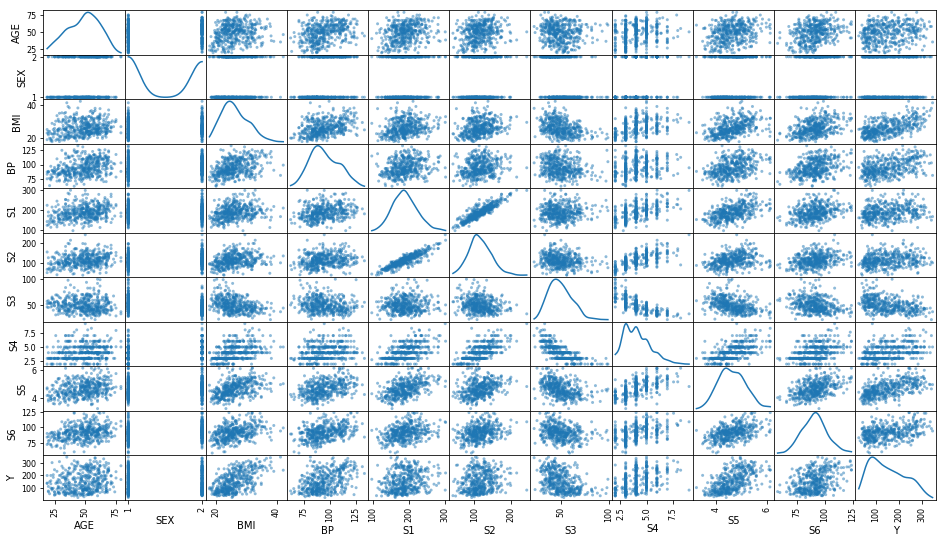

In [8]:
pd.scatter_matrix(data_df,diagonal='kde', # default=hist,
                 figsize=(16,9),
                 range_padding=0.1)

**note1**
- 其实需要查看 得病率 与 其它特征的相关性，不需要heatmap或者pd.scatter_matrix，直接画scatter就可以

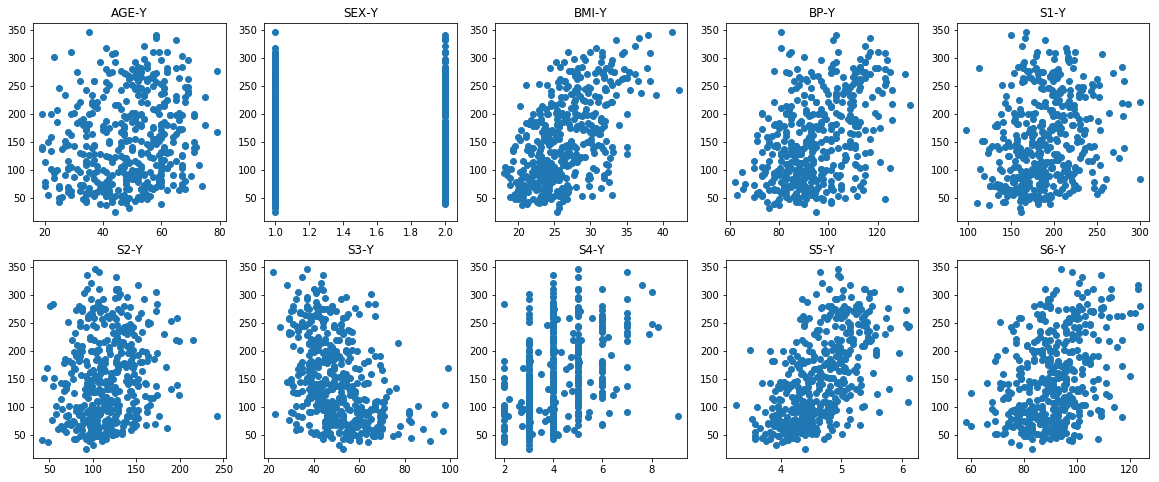

In [34]:
fig, axes = plt.subplots(2,5,figsize=(20,8))
ax = [i for i in range(10)]
for idx, feat in enumerate(FEAT_COLS):
    if idx < 5:
        ax[idx] = axes[0,idx]        
    else:
        ax[idx] = axes[1,idx-5]
    ax[idx].scatter(x=data_df[feat], y=data_df['Y'])
    ax[idx].set_title('{}-Y'.format(feat))
        
#     ax0=axes[0,0]
#     ax0.scatter(x=data_df['AGE'],y=data_df['Y'])
#     ax0.set_title('age-y')

In [49]:
X = data_df[FEAT_COLS]
y = data_df['Y']

```python
X = data_df[FEAT_COLS]
y = data_df['Y']
```
- 加上.values后，数据类型为ndarray，所以不能再进一步slicing，如X_train['AGE']
- 会报错 ```IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices```

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/5, random_state=20)

In [51]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
r2 = lr_model.score(X_test, y_test)
print(r2)

0.41797754631986517


**method 1 - for each feature**

In [59]:
for f in FEAT_COLS:
    lr = LinearRegression()
    X_tr = X_train[f].reshape(-1,1)
    lr.fit(X_tr, y_train)
    r2 = lr.score(X_test[f].reshape(-1,1), y_test)
    print(f, ': r2 = ', r2)

AGE : r2 =  0.036704593970183774
SEX : r2 =  -0.0226264329959478
BMI : r2 =  0.21847731902398204
BP : r2 =  0.1407726363788091
S1 : r2 =  0.011617351750561222
S2 : r2 =  -0.007472848233761598
S3 : r2 =  0.14760059529586977
S4 : r2 =  0.21588545738828724
S5 : r2 =  0.3515587877478441
S6 : r2 =  0.16991832756916592


/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


- Error
```python
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
```

**method 2 - for each feature**

In [58]:
for f in FEAT_COLS:
    x = data_df[feat].values.reshape(-1,1)
    y = data_df['Y'].values
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/5, random_state=20)
    model = LinearRegression()
    model.fit(x_train, y_train)
    r2 = model.score(x_test, y_test)
    print(f, ' -> r2: ', r2)

AGE  -> r2:  0.16991832756916592
SEX  -> r2:  0.16991832756916592
BMI  -> r2:  0.16991832756916592
BP  -> r2:  0.16991832756916592
S1  -> r2:  0.16991832756916592
S2  -> r2:  0.16991832756916592
S3  -> r2:  0.16991832756916592
S4  -> r2:  0.16991832756916592
S5  -> r2:  0.16991832756916592
S6  -> r2:  0.16991832756916592
